In [12]:
import sys
import os
import importlib

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

import files
importlib.reload(files)

import utils
importlib.reload(utils)

from files import *
from utils import *  

In [15]:
for city, path in files4.items():
      globals()[f"consommation_heat_{city}"] = extract_columns(files4[city])

for city2, path2 in files4.items():
      globals()[f"consommation_cool_{city2}"] = extract_columns(files4[city2],5)  

In [16]:
"""
Fusion des DataFrames de consommation pour chaque zone climatique : Toulouse , Zurich ,  Séville
Chaque groupe est combiné en un seul DataFrame par zone.
ex:df_combined_tou
"""
df_combined_tou = pd.concat([consommation_heat_agen, consommation_heat_albi,consommation_heat_auch,consommation_heat_toulouse], axis=0).reset_index(drop=True)

In [18]:
"""
Ajout d'une colonne binaire pour identifier les jours de consommation :
- '1' indique un jour "ON" (consommation > 0)
- '0' indique un jour "OFF" (consommation = 0)
ex:df_final_tou
"""
df_final_tou=add_binary_column(df_combined_tou, column_name="heat_on")

In [19]:
"""
Application de l'algorithme K-Means sur les jours de consommation de chauffage à Toulouse (jours 'ON').
Les jours sans consommation (jours 'OFF') sont automatiquement assignés au cluster 3.
"""

df_heat_tou = df_final_tou[df_final_tou["heat_on"] == 1].drop(columns=["heat_on"])
model_tou = apply_kmeans(n_clusters=3, data=df_heat_tou)
df_final_tou.loc[df_final_tou["heat_on"] == 1, "clusters"] = model_tou.labels_
df_final_tou.loc[df_final_tou["heat_on"] == 0, "clusters"] = 3

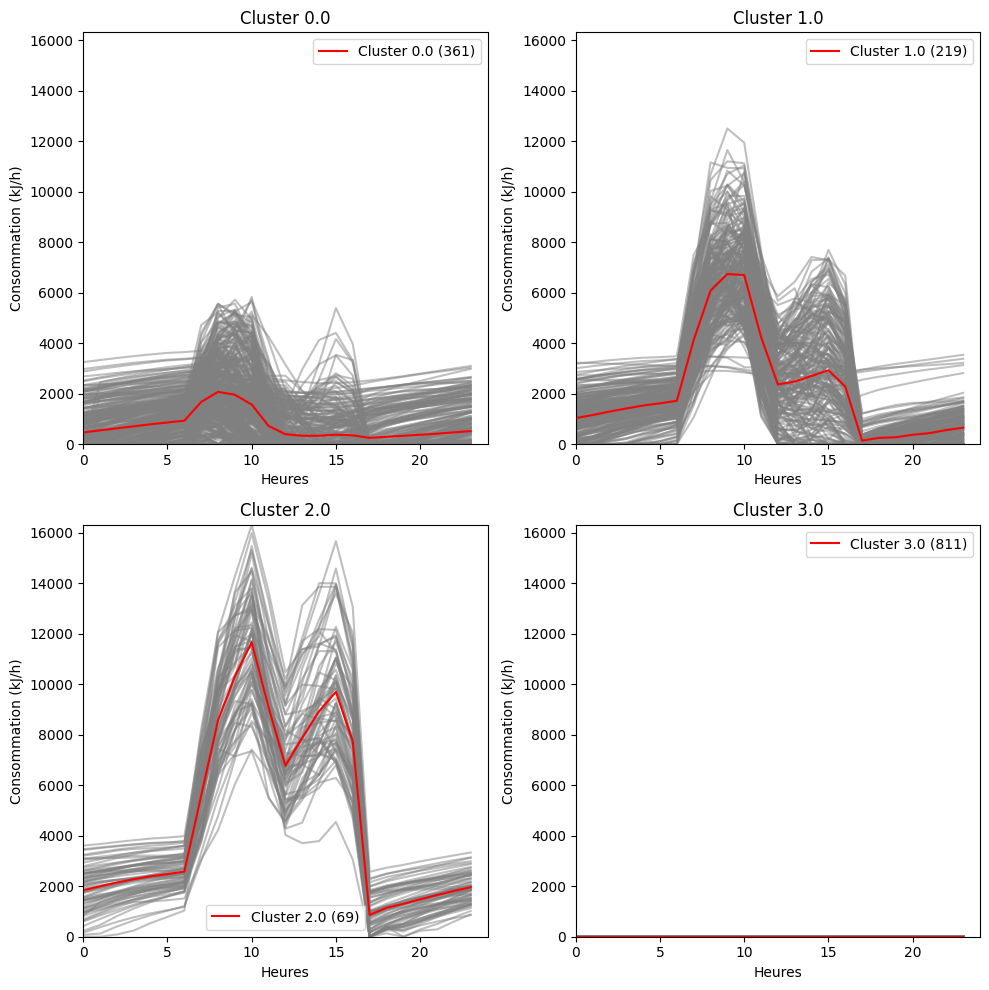

In [20]:
plot_clusters(df_final_tou.drop(columns=["heat_on"]))


In [21]:
df_final_tou.to_csv("../data/simulation_data/conso_kmeans_data/clusters_dataavecoccupation_heat_perif_toulouse_kmeans",index=False)